In [1]:
import pandas as pd
from insight_utils import bar_groups_chart, box_plot
from constants import FORMAT_MODIFIERS, QUALITY_MODIFIERS, QUALITY_MODIFIERS, QUALITY_MODIFIERS, STRUCTURE_MODIFIERS

modifiers_path = "results/modifiers/gpt-3.5-turbo-16k/"
results_path = "results/gpt-3.5-turbo-16k/initial/"
base_prompt_df = pd.read_csv(results_path + "base_prompt.csv")
quality_df = pd.read_csv(modifiers_path + "newquality.csv")

#### Format

In [2]:
quality_df.head()

,prompt_template,examples,num_examples,text,title,prompt,prediction,finish_reason,bert_score,rouge_1,...,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency,config
0,articulate,[[]],0.0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,[],[],...,0.083333,0.0,1,3,9,2.95,0.0,4.55,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
1,eloquent,[[]],0.0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,[],[],...,0.083333,0.0,1,3,9,2.95,0.0,4.45,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
2,well-written,[[]],0.0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and its Concentration in Big Te...,stop,[],[],...,0.083333,0.0,1,3,9,2.95,0.0,4.40,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
3,well-put,[[]],0.0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Rise of AI and the Concentration in Big Te...,stop,[],[],...,0.083333,0.0,1,3,9,3.00,0.0,4.25,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."
4,well-expressed,[[]],0.0,"When I think about the rise of AI, I'm reminde...",NaN,user:\r\nSummarize the text. Text: ###\r\nWhen...,The Concentration of AI in Big Tech Companies\...,stop,[],[],...,0.000000,0.0,1,1,9,2.85,0.0,4.55,0.0,"{'model': 'gpt-3.5-turbo-16k', 'suffix': '', '..."


In [3]:
for m in QUALITY_MODIFIERS:
    print(m)

articulate
eloquent
well-written
well-put
well-expressed
well-stated
well-worded
well-formulated
well-presented
a pleasure to read
a joy to read
a delight to read
delightful
meaningful, persuasive, and delightful
masterfully written
masterpieces of the English language
understandable and enjoyable for everyone
well-crafted
skillfully and effectively written
accurately articulated
a joy to peruse
enjoyable to read
an absolute pleasure to read
an enjoyable reading experience
expertly crafted
expertly written
outstanding works of English literature
literary works of great importance in the English language
easily comprehensible and enjoyable for individuals of all backgrounds
adorable, delightful, enchanting, charming


In [4]:
quality_df.describe()

,num_examples,title,slor,avg_error_count_score,errors,contradiction_ratio,neutral_contradiction_ratio,number_hallucinations,three_by_three,long_subheadings,long_bullets,geval_fluency,geval_relevance,geval_coherence,geval_consistency
count,901.0,0.0,901.0,901.000000,901.000000,901.000000,901.000000,901.0,901.000000,901.000000,901.000000,901.000000,901.0,901.000000,901.0
mean,0.0,NaN,0.0,0.995374,0.689234,0.062276,0.020424,0.0,0.795782,1.345172,8.195339,2.893196,0.0,4.489900,0.0
std,0.0,NaN,0.0,0.010499,1.294855,0.089881,0.048151,0.0,0.403353,1.129234,1.708027,0.117221,0.0,0.155335,0.0
min,0.0,NaN,0.0,0.942626,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.100000,0.0,4.000000,0.0
25%,0.0,NaN,0.0,0.996032,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,8.000000,2.850000,0.0,4.400000,0.0
50%,0.0,NaN,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,9.000000,2.900000,0.0,4.500000,0.0
75%,0.0,NaN,0.0,1.000000,1.000000,0.083333,0.000000,0.0,1.000000,2.000000,9.000000,2.950000,0.0,4.600000,0.0
max,0.0,NaN,0.0,1.000000,7.000000,0.583333,0.416667,0.0,1.000000,3.000000,9.000000,3.000000,0.0,4.950000,0.0


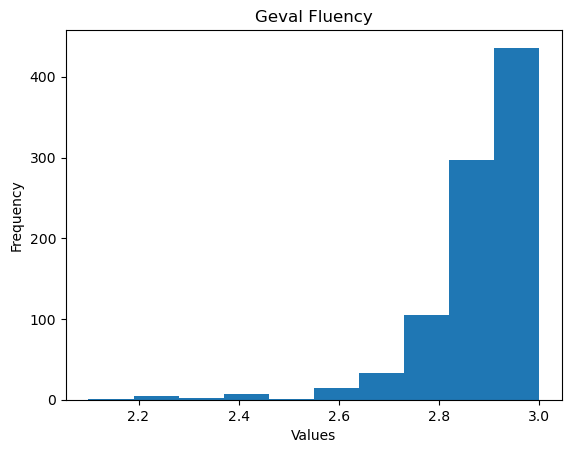

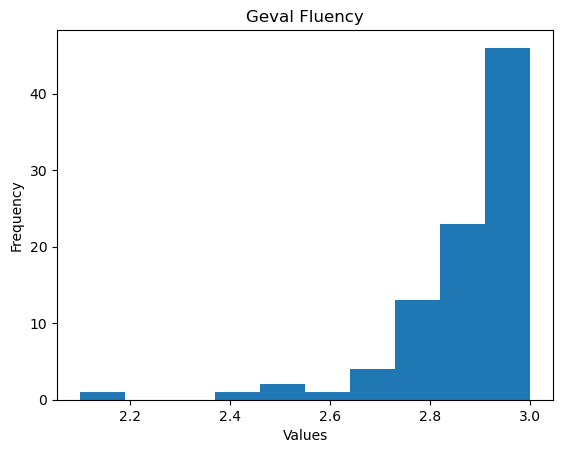

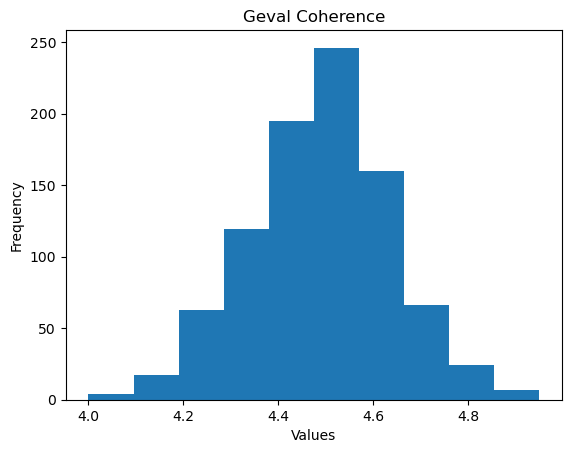

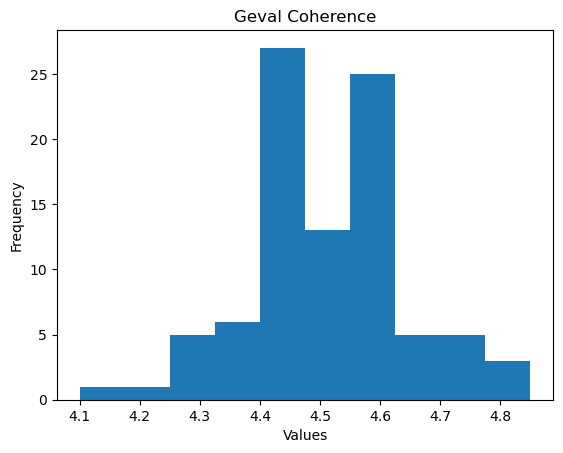

In [5]:
import matplotlib.pyplot as plt

# Create a histogram of a numerical column
plt.hist(quality_df["geval_fluency"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Fluency")
plt.show()

plt.hist(base_prompt_df["geval_fluency"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Fluency")
plt.show()

plt.hist(quality_df["geval_coherence"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Coherence")
plt.show()

plt.hist(base_prompt_df["geval_coherence"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Geval Coherence")
plt.show()

#### Split results by modifier into separate dataframes

In [6]:
dataframes = [base_prompt_df]

for modifier in QUALITY_MODIFIERS:
    modifier_df = quality_df[quality_df["prompt_template"] == modifier]
    dataframes.append(modifier_df)

print("####### 30 tries per modifier #######\n")



####### 30 tries per modifier #######



#### To evaluate: entailment, errors, geval_fluency, geval_coherence

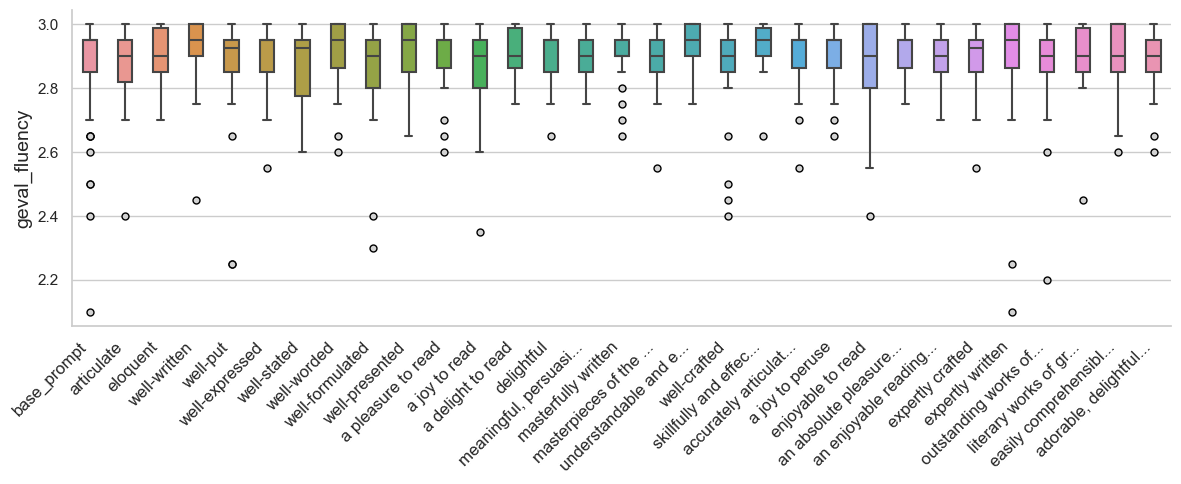

In [7]:
evaluate = [
        # "contradiction_ratio",
        # "errors",
        "geval_fluency",
        # "geval_coherence",
    ]

shortened_modifiers = []

for modifier in QUALITY_MODIFIERS:
    if len(modifier) > 20:
        shortened_modifiers.append(modifier[:20] + "...")
    else:
        shortened_modifiers.append(modifier)

for eval in evaluate:
    # box_plot(dataframes[:(len(dataframes)+1)//2], ["base_prompt"] + shortened_modifiers[:(len(dataframes))//2], eval, width=16)
    # box_plot(dataframes[(len(dataframes)+1)//2:], ["base_prompt"] + shortened_modifiers[(len(dataframes)+1)//2:], eval, width=16)
    box_plot(dataframes, ["base_prompt"] + shortened_modifiers, eval, width=12, height=5)


# dic = {}

# for i, df in enumerate(dataframes):
    # success_rate = (df["three_by_three"].sum() / 30) * 100
    # modifier = QUALITY_MODIFIERS[i]
    # dic.update({modifier: round(success_rate)})

# sorted_dic = dict(sorted(dic.items(), key=lambda item: item[1], reverse=True))
# result_df = pd.DataFrame(sorted_dic.items(),columns=["Modifier", "Success Rate"])

# print(result_df.style.to_latex())